In [1]:
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import Layout, Button, Box, VBox,HBox, Label
from IPython import get_ipython
ipython = get_ipython()
from IPython.display import clear_output

In [2]:
def prob_slider():
    slider = widgets.FloatSlider(value=0.5,
    min=0,
    max=1.0,
    step=0.05,
    readout = False
   )
    pw1 = widgets.FloatText(
    value=0.5,
    description='$p(\omega_1)$',
    disabled=True,
    width = '150px'
    )
    pw2 = widgets.FloatText(
    value=0.5,
    description='$p(\omega_2)$',
    disabled=True,
    width = '150px'
    )
    def handle_slider_change(change):
        pw1.value = change.new
        pw2.value = round(1 -change.new,2)

    slider.observe(handle_slider_change, names='value')
    grid = HBox([pw1,slider,pw2],flex_flow = 'row',align_items = 'space-between')
    return grid

def on_button_clicked(b):
    if  b.button_style == '':
        b.button_style = 'danger'
    else:
         b.button_style = ''

def button_grid():
    item_layout = Layout(height='30px', width='30px')
    items = [Button(layout=item_layout, button_style='') for i in range(35)]
    for i in items:
        i.on_click(on_button_clicked)
    box_layout = Layout(width = '180px')
    grid = Box(children=items, layout=box_layout)
    return grid

def pass_data(b):
    clear_output()
    l1 = list()
    for i in letter1.children:
        if i.button_style == 'danger':
            l1.append(1)
        else:
            l1.append(0)
    l2 = list()
    for i in letter2.children:
        if i.button_style == 'danger':
            l2.append(1)
        else:
            l2.append(0)
    global l, pw
    l = [l1,l2]
    pw = [prob.children[0].value,prob.children[2].value]
    ipython.magic('%store l')
    ipython.magic('%store pw')
    ipython.magic('%run pattern-recognition-script.ipynb')
    

In [3]:
def dash():
    global letter1, letter2,prob
    title = Label(value='Pattern recognition')
    prob = prob_slider()
    letter1 = button_grid()
    letter2 = button_grid()
    letters = HBox([letter1,letter2],flex_flow = 'row',align_items = 'space-between')
    button = Button(description = 'Go!')
    button.on_click(pass_data)
    form_items = [title,letters,prob,button]
    form = Box(form_items, layout=Layout(
        display='flex',
        flex_flow='column',
        align_items='center'
    ))
    return form

Stored 'l' (list)
Stored 'pw' (list)


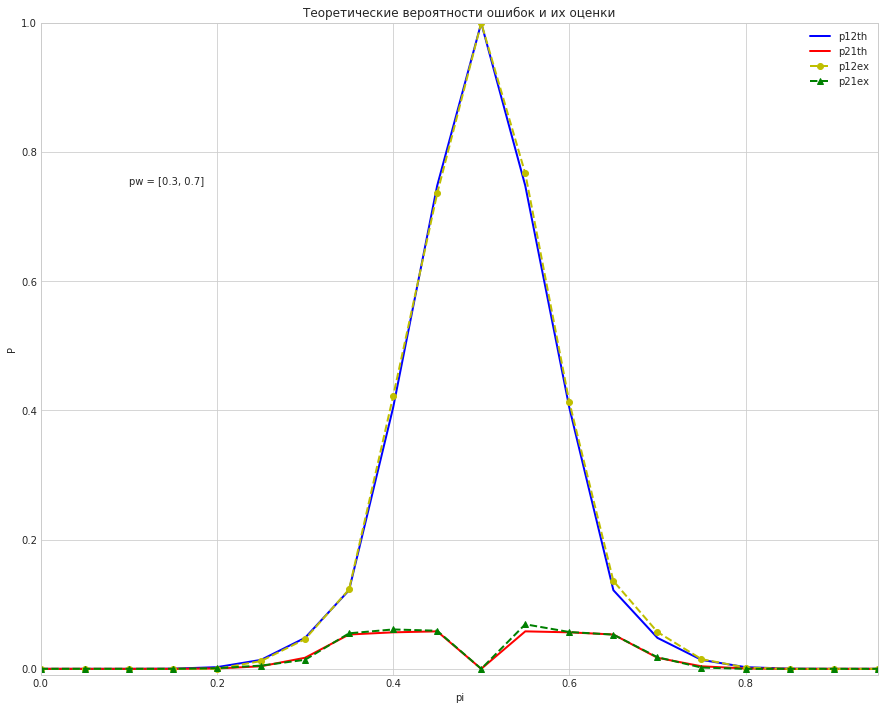

In [6]:
form = dash()
display(form)